### 유동인구와 음식업종 사이 상관관계

In [3]:
!pip install statsmodels
import statsmodels.api as sm
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy.stats as stats

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
# 글씨 깨짐 방지
from matplotlib import rc  
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

In [6]:
# 빅쿼리에 접근

from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("./data/burnished-core-313703-da23d34dff29.json")

In [7]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

## 22년 유동인구 ~ 업종 관계

In [55]:
population=pd.read_csv("/Users/oyujeong/Downloads/서울시 상권분석서비스(길단위인구-자치구).csv",encoding='utf-8')
population = population[population['year_quater_cd'].isin([20221, 20222, 20223, 20224])]
population=population.drop(columns='autono_cd')
population.columns=['quter','gu','total','female','male','10','20','30','40','50','60','mon','tue','wed','thur','fri','sat','sun']

In [56]:
population

,quter,gu,total,female,male,10,20,30,40,50,60,mon,tue,wed,thur,fri,sat,sun
300,20221,종로구,64579681,31689128,32890554,6860851,11763848,10101696,10601330,10701303,14550652,9420492,9436892,9477760,9679143,9648814,8674894,8241688
301,20221,중구,56147459,28135601,28011860,4533645,9421691,11181598,10272268,9203238,11535019,8422016,8379766,8406686,8723738,8680339,7026198,6508717
302,20221,용산구,65112295,31122415,33989880,7931379,10194420,13073000,11279177,9288924,13345394,9277176,9268054,9325634,9363912,9374584,9251334,9251601
303,20221,성동구,75380060,35900322,39479737,10318914,12633883,13628308,12246746,11022951,15529258,10800375,10804802,10866488,10944076,10925288,10579590,10459440
304,20221,광진구,94688581,44189305,50499277,13683047,17907890,16060363,14492727,13800624,18743931,13384067,13385686,13452533,13412187,13444259,13758101,13851751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,20224,관악구,129482971,63781424,65701547,13928388,30505184,24620321,18460420,16235664,25732994,18450895,18132117,18146830,18079075,18139776,19011624,19522654
396,20224,서초구,97694530,47201997,50492533,16278162,13705657,17675637,18841691,13816371,17377013,14138417,14636774,14625881,14632385,14545560,12835675,12279840
397,20224,강남구,143390286,70147871,73242415,22159557,23620165,29596542,28372899,18674091,20967033,20702473,21865079,21877551,21904824,21612237,18381940,17046182
398,20224,송파구,122898991,57611543,65287448,21231867,15650858,21461225,20573739,18068191,25913111,17581245,17497712,17500782,17453160,17525068,17639178,17701846


In [57]:
price=pd.read_csv("/Users/oyujeong/Downloads/서울시 상권분석서비스(추정매출-자치구).csv")
price=price[price['year_quater_cd'].isin([20221, 20222, 20223, 20224])]
price=price.drop(columns='autono_cd')
price=price[price['service_nm'].isin(['치킨전문점', '호프-간이주점', '일식음식점', '양식음식점','한식음식점','커피-음료', '중식음식점','제과점','분식전문점', '패스트푸드점'])]

In [58]:
price

,year_quater_cd,autono_nm,service_cd,service_nm,month_sales_amount,month_sales_cnt,week_sales_amount,weekend_sales_amount,Mon_sales_amount,Tue_sales_amount,...,hour_17to21_sales_amount,hour_21to24_sales_amount,male_sales_amount,female_sales_amount,gen10_sales_amount,gen20_sales_amount,gen30_sales_amount,gen40_sales_amount,gen50_sales_amount,gen60_sales_amount
6870,20221,종로구,CS100007,치킨전문점,2635161447,96827,2004270511,630890936,342537479,368883428,...,1497956498,694921393,1450541509,834148445,17344702,458227887,548533225,518222182,489778216,252583726
6871,20221,종로구,CS100009,호프-간이주점,14568079037,282966,9812339207,4755739830,1751147931,1820163392,...,7160545454,5838768182,8482093525,4517260871,178875479,4202668911,3121786151,2019360035,2208906127,1267757681
6890,20221,용산구,CS100007,치킨전문점,2255278558,81676,1645915880,609362678,272061873,313293694,...,1336236159,641578138,1120139667,842342104,16216815,321400115,504112585,449853563,451471061,219427626
6902,20221,성동구,CS100003,일식음식점,3819685724,100685,2972007470,847678254,521222761,569503687,...,1831863098,475797071,1737145197,1099490909,28926913,866908127,650864553,434637523,531687731,323611259
6903,20221,성동구,CS100004,양식음식점,2325451829,69077,1578688645,746763184,275381954,280722938,...,948359703,291615939,858803877,1048663560,31213482,754840036,584288412,247094618,194335680,95695211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22414,20224,서초구,CS100005,제과점,20188213323,1736150,14345645779,5842567544,2401656675,2747353765,...,4884659769,757457185,7098267645,10057364249,115110929,2158597459,3849929507,4497854803,3460984088,3073155105
22421,20224,강남구,CS100008,분식전문점,54104688529,3847191,40927356146,13177332383,6505616463,7686756490,...,15836185677,5240826907,22257330776,21771933197,762508046,9409251064,12480288629,10673351388,7326021348,3377843518
22426,20224,송파구,CS100009,호프-간이주점,27296930813,473488,17265429403,10031501410,2715942550,3162729652,...,5063582632,12407372191,16879162115,8006805856,265981389,7882884367,7104643942,4395570452,3666126135,1570761695
22427,20224,송파구,CS100010,커피-음료,41229810314,5036993,28261735121,12968075193,5006194190,5440093398,...,9087391176,1991071109,16712875978,20537414583,522074932,8600735080,11342011036,8571985495,5375692571,2837791469


In [59]:
price=price.reset_index(drop=True)
price.drop(columns=['service_cd','week_sales_amount','weekend_sales_amount','hour_00to06_sales_amount',
                   'hour_06to11_sales_amount', 'hour_11to14_sales_amount',
                   'hour_14to17_sales_amount', 'hour_17to21_sales_amount',
                   'hour_21to24_sales_amount'],inplace=True)

In [60]:
price

,year_quater_cd,autono_nm,service_nm,month_sales_amount,month_sales_cnt,Mon_sales_amount,Tue_sales_amount,Wed_sales_amount,Thur_sales_amount,Fri_sales_amount,Sat_sales_amount,Sun_sales_amount,male_sales_amount,female_sales_amount,gen10_sales_amount,gen20_sales_amount,gen30_sales_amount,gen40_sales_amount,gen50_sales_amount,gen60_sales_amount
0,20221,종로구,치킨전문점,2635161447,96827,342537479,368883428,409414144,422882643,460552817,373341680,257549256,1450541509,834148445,17344702,458227887,548533225,518222182,489778216,252583726
1,20221,종로구,호프-간이주점,14568079037,282966,1751147931,1820163392,1788262968,2076260895,2376504021,2936726568,1819013262,8482093525,4517260871,178875479,4202668911,3121786151,2019360035,2208906127,1267757681
2,20221,용산구,치킨전문점,2255278558,81676,272061873,313293694,344230446,352095466,364234401,408933434,200429244,1120139667,842342104,16216815,321400115,504112585,449853563,451471061,219427626
3,20221,성동구,일식음식점,3819685724,100685,521222761,569503687,585173097,654589181,641518744,547019866,300658388,1737145197,1099490909,28926913,866908127,650864553,434637523,531687731,323611259
4,20221,성동구,양식음식점,2325451829,69077,275381954,280722938,324006031,357939948,340637774,421875742,324887442,858803877,1048663560,31213482,754840036,584288412,247094618,194335680,95695211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20224,서초구,제과점,20188213323,1736150,2401656675,2747353765,2815904777,2911263848,3469466714,3415922670,2426644874,7098267645,10057364249,115110929,2158597459,3849929507,4497854803,3460984088,3073155105
996,20224,강남구,분식전문점,54104688529,3847191,6505616463,7686756490,8649302671,9056713287,9028967235,8193689106,4983643277,22257330776,21771933197,762508046,9409251064,12480288629,10673351388,7326021348,3377843518
997,20224,송파구,호프-간이주점,27296930813,473488,2715942550,3162729652,3358298755,3614625857,4413832589,6294526258,3736975152,16879162115,8006805856,265981389,7882884367,7104643942,4395570452,3666126135,1570761695
998,20224,송파구,커피-음료,41229810314,5036993,5006194190,5440093398,5627165968,5840659748,6347621817,7353369559,5614705634,16712875978,20537414583,522074932,8600735080,11342011036,8571985495,5375692571,2837791469


In [61]:
service_nm=price['service_nm'].unique()

In [62]:
service_nm

array(['치킨전문점', '호프-간이주점', '일식음식점', '양식음식점', '한식음식점', '커피-음료', '중식음식점',
       '제과점', '분식전문점', '패스트푸드점'], dtype=object)

## 22년 1234분기 연령대별 유동인구 ~ 업종 관계

In [19]:
# for i in range(len(service_nm)):
#     globals()[f'x_{i}']=price[price['service_nm']==service_nm[i]]
#     for j in range(20221, 20225):
#         globals()[f'xx_{j}']=price[price['year_quater_cd']==j].reset_index(drop=True)
        

In [20]:
# for i in range(len(service_nm)):
#     for j in range(20221, 20225):
#         globals()[f'xx{i}']=pd.merge(population,globals()[f'xx_{j}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
#         x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
#         y=globals()[f'xx{i}'][['month_sales_amount']]
#         model=sm.OLS(y,x).fit()
#         print(model.summary())

## 뭐묘 알제곱 결과 왜저러묘;

In [63]:
# 22년 1분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20221)].reset_index(drop=True)


In [64]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     17.41
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.57e-06
Time:                        09:58:08   Log-Likelihood:                -531.83
No. Observations:                  25   AIC:                             1082.
Df Residuals:                      16   BIC:                             1093.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.519e+08    5.5e+08      0.822      0.4

In [ ]:
# 22년 1분기 결과
'치킨전문점' : x
'호프-간이주점' : 40
'일식음식점' : 40 전체 여 남
'양식음식점' : 40 전체 여 남
'한식음식점' : 40
'커피-음료' : 40 20
'중식음식점' : 40 50 20
'제과점' : x
'분식전문점' : 40
'패스트푸드점' : 40

In [65]:
# 22년 2분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20222)].reset_index(drop=True)


In [66]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     17.84
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.33e-06
Time:                        10:07:38   Log-Likelihood:                -547.26
No. Observations:                  25   AIC:                             1113.
Df Residuals:                      16   BIC:                             1123.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.954e+06    9.9e+08      0.010      0.9

In [ ]:
# 22년 2분기 결과
'치킨전문점' : 40
'호프-간이주점' :40
'일식음식점' :40
'양식음식점' :40
'한식음식점' :40 전체 남 여
'커피-음료' : 40 20
'중식음식점' : 40 20 50
'제과점' : 40
'분식전문점' :40
'패스트푸드점' :40

In [69]:
# 22년 3분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20223)].reset_index(drop=True)


In [70]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     16.14
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           2.65e-06
Time:                        10:11:29   Log-Likelihood:                -548.16
No. Observations:                  25   AIC:                             1114.
Df Residuals:                      16   BIC:                             1125.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.844e+07   1.04e+09      0.085      0.9

In [ ]:
# 22년 3분기 결과
'치킨전문점' : 40
'호프-간이주점' :40
'일식음식점' :40(0.00)
'양식음식점' :40
'한식음식점' :40
'커피-음료' :40 20
'중식음식점' :40 50
'제과점' :40
'분식전문점' :40
'패스트푸드점' :40

In [71]:
# 22년 4분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20224)].reset_index(drop=True)


In [72]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     17.22
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.70e-06
Time:                        10:14:25   Log-Likelihood:                -547.56
No. Observations:                  25   AIC:                             1113.
Df Residuals:                      16   BIC:                             1124.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.811e+08   9.96e+08      0.584      0.5

In [ ]:
# 22년 4분기 결과
'치킨전문점' : 40 10
'호프-간이주점' :40
'일식음식점' :40 20
'양식음식점' :40
'한식음식점' :40 (20 -> 0.064)
'커피-음료' :40 20
'중식음식점' :40 50 20
'제과점' :40
'분식전문점' :40
'패스트푸드점' :40 (20 -> 0.059), 50대 유의확률이 점점 0.05에 가까워지고 있음 => 상관이 생기고 있다?

## 21년 유동인구 ~ 업종 관계

In [75]:
population=pd.read_csv("/Users/oyujeong/Downloads/서울시 상권분석서비스(길단위인구-자치구).csv",encoding='utf-8')
population = population[population['year_quater_cd'].isin([20211, 20212, 20213, 20214])]
population=population.drop(columns='autono_cd')
population.columns=['quter','gu','total','female','male','10','20','30','40','50','60','mon','tue','wed','thur','fri','sat','sun']

population

,quter,gu,total,female,male,10,20,30,40,50,60,mon,tue,wed,thur,fri,sat,sun
200,20211,종로구,64341967,32084258,32257708,6750164,10996362,10266308,10820315,10731879,14776939,9478032,9734691,9723859,9557561,9356653,8445144,8046027
201,20211,중구,56500462,28457282,28043180,4392557,9055207,11255400,10366847,9362790,12067661,8580951,8841247,8796661,8581849,8324522,6939497,6435734
202,20211,용산구,65905116,31663624,34241494,7780123,10258508,13116125,11614117,9376358,13759886,9486320,9515497,9506524,9468413,9416920,9232250,9279195
203,20211,성동구,76432709,36421251,40011458,10528769,12417979,13812026,12414178,11179520,16080239,11028267,11096127,11090165,11018937,10935906,10667467,10595839
204,20211,광진구,95233549,44444469,50789080,13824047,17444027,16096365,14651425,13959358,19258328,13541900,13500152,13483404,13486859,13472690,13779468,13969076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,20214,관악구,131082454,64492665,66589789,14209253,30131051,24740092,18755782,16452187,26794092,18631042,18449079,18442119,18418872,18429884,19180846,19530613
296,20214,서초구,99560677,48003023,51557654,16394613,14042922,18054571,19143669,13892906,18031996,14462604,14914615,14914246,14900285,14753836,13070925,12544166
297,20214,강남구,141200009,68973033,72226978,21389839,23367968,29109697,27798354,18214190,21319963,20486721,21481191,21524690,21497195,21126091,18168545,16915576
298,20214,송파구,125908617,59029402,66879214,21478110,16634174,21866926,20844880,18560037,26524489,18006761,17992882,17977354,17973738,17964537,17977372,18015973


In [76]:
price=pd.read_csv("/Users/oyujeong/Downloads/서울시 상권분석서비스(추정매출-자치구).csv")
price=price[price['year_quater_cd'].isin([20211, 20212, 20213, 20214])]
price=price.drop(columns='autono_cd')
price=price[price['service_nm'].isin(['치킨전문점', '호프-간이주점', '일식음식점', '양식음식점','한식음식점','커피-음료', '중식음식점','제과점','분식전문점', '패스트푸드점'])]

price

,year_quater_cd,autono_nm,service_cd,service_nm,month_sales_amount,month_sales_cnt,week_sales_amount,weekend_sales_amount,Mon_sales_amount,Tue_sales_amount,...,hour_17to21_sales_amount,hour_21to24_sales_amount,male_sales_amount,female_sales_amount,gen10_sales_amount,gen20_sales_amount,gen30_sales_amount,gen40_sales_amount,gen50_sales_amount,gen60_sales_amount
5966,20211,중구,CS100005,제과점,11039508523,997656,8651392565,2388115958,1458590357,1709762136,...,2770051380,332057400,4020149781,5021899739,35171787,1797305147,2509258214,1955942362,1492703473,1251668537
5969,20211,중구,CS100006,패스트푸드점,4539706689,446039,3543839837,995866852,636730290,733735372,...,1312953914,236284701,2091158752,1760768205,38905813,1078744689,1195821423,813483640,496619555,228351840
5986,20211,광진구,CS100007,치킨전문점,2181743180,134794,1471152647,710590533,231448442,288852507,...,1189795958,725928497,1298873975,790335375,31901062,616674139,409423117,366687615,417362922,247160505
5995,20211,동대문구,CS100008,분식전문점,5048970674,469394,3700366280,1348604394,698984332,723800932,...,1729951970,629208646,2576508396,2098641848,77267786,1215095206,993423175,1113716978,844353394,431293710
5998,20211,동대문구,CS100003,일식음식점,2108909459,58778,1598697963,510211496,265589476,307168853,...,1075724774,339615364,1075771461,656010469,15244756,509351066,401533902,310626612,345540093,149485503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26390,20214,서대문구,CS100005,제과점,5534762548,585580,4051095825,1483666723,717255451,763617962,...,1669747813,457444828,2060488527,3038813484,75464836,949957308,1017714355,1343633590,1054743636,657788283
26396,20214,마포구,CS100007,치킨전문점,4887247300,200804,3465399903,1421847397,549737837,584130536,...,2205668102,1781750643,2700692758,1728579675,67179882,976653805,938764976,992299077,1004849654,449525038
26404,20214,양천구,CS100008,분식전문점,5965583912,663074,4138504625,1827079287,726460398,786655925,...,2008954975,450460152,3025681586,2742666391,132114896,790842151,1127074992,1871383889,1255459454,591472579
26405,20214,양천구,CS100007,치킨전문점,3112946408,170808,2081050359,1031896049,320465046,348612378,...,1682584788,909368478,1784922570,1203025151,52575675,348278746,481289861,964865570,833278826,307659038


In [77]:
# 필요 없는 컬럼 날려
price=price.reset_index(drop=True)
price.drop(columns=['service_cd','week_sales_amount','weekend_sales_amount','hour_00to06_sales_amount',
                   'hour_06to11_sales_amount', 'hour_11to14_sales_amount',
                   'hour_14to17_sales_amount', 'hour_17to21_sales_amount',
                   'hour_21to24_sales_amount'],inplace=True)

In [78]:
price

,year_quater_cd,autono_nm,service_nm,month_sales_amount,month_sales_cnt,Mon_sales_amount,Tue_sales_amount,Wed_sales_amount,Thur_sales_amount,Fri_sales_amount,Sat_sales_amount,Sun_sales_amount,male_sales_amount,female_sales_amount,gen10_sales_amount,gen20_sales_amount,gen30_sales_amount,gen40_sales_amount,gen50_sales_amount,gen60_sales_amount
0,20211,중구,제과점,11039508523,997656,1458590357,1709762136,2147045376,1585922555,1750072141,1293746235,1094369723,4020149781,5021899739,35171787,1797305147,2509258214,1955942362,1492703473,1251668537
1,20211,중구,패스트푸드점,4539706689,446039,636730290,733735372,775249847,665430446,732693882,542894175,452972677,2091158752,1760768205,38905813,1078744689,1195821423,813483640,496619555,228351840
2,20211,광진구,치킨전문점,2181743180,134794,231448442,288852507,291568281,274743480,384539937,393818083,316772450,1298873975,790335375,31901062,616674139,409423117,366687615,417362922,247160505
3,20211,동대문구,분식전문점,5048970674,469394,698984332,723800932,758137479,700483939,818959598,758933112,589671282,2576508396,2098641848,77267786,1215095206,993423175,1113716978,844353394,431293710
4,20211,동대문구,일식음식점,2108909459,58778,265589476,307168853,361532019,306096640,358310975,331377108,178834388,1075771461,656010469,15244756,509351066,401533902,310626612,345540093,149485503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20214,서대문구,제과점,5534762548,585580,717255451,763617962,757896467,757508042,1054817903,802500319,681166404,2060488527,3038813484,75464836,949957308,1017714355,1343633590,1054743636,657788283
996,20214,마포구,치킨전문점,4887247300,200804,549737837,584130536,667434768,709595931,954500831,830786566,591060831,2700692758,1728579675,67179882,976653805,938764976,992299077,1004849654,449525038
997,20214,양천구,분식전문점,5965583912,663074,726460398,786655925,812461969,833699699,979226634,990400026,836679261,3025681586,2742666391,132114896,790842151,1127074992,1871383889,1255459454,591472579
998,20214,양천구,치킨전문점,3112946408,170808,320465046,348612378,366744383,401973158,643255394,559817094,472078955,1784922570,1203025151,52575675,348278746,481289861,964865570,833278826,307659038


In [79]:
service_nm=price['service_nm'].unique()
service_nm

array(['제과점', '패스트푸드점', '치킨전문점', '분식전문점', '일식음식점', '양식음식점', '커피-음료',
       '중식음식점', '호프-간이주점', '한식음식점'], dtype=object)

## 21년 1234분기 연령대별 유동인구 ~ 업종 관계

In [80]:
# for i in range(len(service_nm)):
#     globals()[f'x_{i}']=price[price['service_nm']==service_nm[i]]
#     for j in range(20211, 20215):
#         globals()[f'xx_{j}']=price[price['year_quater_cd']==j].reset_index(drop=True)

In [81]:
# for i in range(len(service_nm)):
#     for j in range(20211, 20215):
#         globals()[f'xx{i}']=pd.merge(population,globals()[f'xx_{j}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
#         x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
#         y=globals()[f'xx{i}'][['month_sales_amount']]
#         model=sm.OLS(y,x).fit()
#         print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     4.099
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           0.000134
Time:                        10:20:14   Log-Likelihood:                -6367.3
No. Observations:                 250   AIC:                         1.275e+04
Df Residuals:                     241   BIC:                         1.278e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.775e+09   9.43e+09     -0.400      0.6

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     3.987
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           0.000185
Time:                        10:20:14   Log-Likelihood:                -6375.3
No. Observations:                 250   AIC:                         1.277e+04
Df Residuals:                     241   BIC:                         1.280e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.361e+08    9.9e+09     -0.064      0.9

In [82]:
# 21년 1분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20211)].reset_index(drop=True)


In [83]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     10.65
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           4.09e-05
Time:                        10:20:20   Log-Likelihood:                -566.00
No. Observations:                  25   AIC:                             1150.
Df Residuals:                      16   BIC:                             1161.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.312e+09   2.16e+09     -0.608      0.5

In [12]:
# 21년 1분기 결과
'제과점': 40 전체 여 남
'패스트푸드점':40 (30 -> 0.086 점점 0.05에 가까워짐)
'치킨전문점': x
'분식전문점': 40
'일식음식점':40
'양식음식점':40
'커피-음료':40 20
'중식음식점':40
'호프-간이주점':40 (20 -> 0.060)
'한식음식점':40

In [84]:
# 21년 2분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20212)].reset_index(drop=True)


In [85]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     5.820
Date:                Fri, 17 Nov 2023   Prob (F-statistic):            0.00140
Time:                        10:24:55   Log-Likelihood:                -572.57
No. Observations:                  25   AIC:                             1163.
Df Residuals:                      16   BIC:                             1174.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.894e+08   2.84e+09      0.102      0.9

In [ ]:
# 21년 2분기 결과
'제과점': x(40 -> 0.067)
'패스트푸드점':40
'치킨전문점': 40
'분식전문점': 40
'일식음식점':40
'양식음식점':40
'커피-음료':40 20
'중식음식점':40
'호프-간이주점':40 20
'한식음식점':40

In [86]:
# 21년 3분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20213)].reset_index(drop=True)


In [87]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     5.668
Date:                Fri, 17 Nov 2023   Prob (F-statistic):            0.00161
Time:                        10:28:23   Log-Likelihood:                -572.42
No. Observations:                  25   AIC:                             1163.
Df Residuals:                      16   BIC:                             1174.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.546e+08   2.84e+09      0.266      0.7

In [ ]:
# 21년 3분기 결과
'제과점': x(40 -> 0.060)
'패스트푸드점':40
'치킨전문점': x
'분식전문점': 40 (전체 남 여 -> 0.057)
'일식음식점':40
'양식음식점':40
'커피-음료':40 (20 -> 0.055)
'중식음식점':40 (50 -> 0.053)
'호프-간이주점':40
'한식음식점':40

In [88]:
# 21년 4분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20214)].reset_index(drop=True)


In [89]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     6.586
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           0.000715
Time:                        10:30:52   Log-Likelihood:                -574.12
No. Observations:                  25   AIC:                             1166.
Df Residuals:                      16   BIC:                             1177.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.497e+08      3e+09     -0.083      0.9

In [ ]:
# 21년 4분기 결과
'제과점': x
'패스트푸드점':40
'치킨전문점': 40
'분식전문점': 40
'일식음식점':40
'양식음식점':40
'커피-음료':40 20
'중식음식점':40 (50 -> 0.052)
'호프-간이주점':40
'한식음식점':40

## 20년 유동인구 ~ 업종 관계

In [90]:
population=pd.read_csv("/Users/oyujeong/Downloads/서울시 상권분석서비스(길단위인구-자치구).csv",encoding='utf-8')
population = population[population['year_quater_cd'].isin([20201, 20202, 20203, 20204])]
population=population.drop(columns='autono_cd')
population.columns=['quter','gu','total','female','male','10','20','30','40','50','60','mon','tue','wed','thur','fri','sat','sun']

population

,quter,gu,total,female,male,10,20,30,40,50,60,mon,tue,wed,thur,fri,sat,sun
100,20201,종로구,68373459,34319316,34054145,6910651,12116383,10980256,11513146,11077605,15775419,10028475,10305292,10211025,10273247,10117430,9009413,8428578
101,20201,중구,60935077,30631104,30303971,4541396,9850497,12051270,11108587,10056432,13326892,9184343,9540294,9378148,9504825,9273361,7328480,6725627
102,20201,용산구,69328914,33255338,36073576,8209395,11344105,13610916,11895586,9540097,14728815,9915506,9961330,9952034,9964600,9961670,9769539,9804237
103,20201,성동구,80097955,38103010,41994945,11426002,12958952,14174665,12752257,11572939,17213139,11497506,11585591,11570278,11578692,11500000,11218954,11146934
104,20201,광진구,98472026,46180306,52291719,14532047,18029016,16312441,14844019,14354843,20399658,13967576,13929379,13961898,13914058,13920154,14295628,14483334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20204,관악구,133614173,65456997,68157177,14733264,30421620,24931029,19058898,16622962,27846401,18830386,18762187,18787324,18730400,18811710,19591545,20100621
196,20204,서초구,98869528,47538299,51331229,15575441,14077192,18084200,18636751,13720134,18775808,14770357,14898913,14874924,14501658,14267329,12999834,12556515
197,20204,강남구,141341215,68817472,72523742,20786115,23614788,29369536,27423568,17928690,22218518,21302086,21686397,21685232,20957854,20470358,18153111,17086177
198,20204,송파구,127383379,59616426,67766953,21475877,16977731,21990384,20857651,18878975,27202760,18267332,18241117,18227260,18120704,18115943,18122210,18288809


In [91]:
price=pd.read_csv("/Users/oyujeong/Downloads/서울시 상권분석서비스(추정매출-자치구).csv")
price=price[price['year_quater_cd'].isin([20201, 20202, 20203, 20204])]
price=price.drop(columns='autono_cd')
price=price[price['service_nm'].isin(['치킨전문점', '호프-간이주점', '일식음식점', '양식음식점','한식음식점','커피-음료', '중식음식점','제과점','분식전문점', '패스트푸드점'])]

price

,year_quater_cd,autono_nm,service_cd,service_nm,month_sales_amount,month_sales_cnt,week_sales_amount,weekend_sales_amount,Mon_sales_amount,Tue_sales_amount,...,hour_17to21_sales_amount,hour_21to24_sales_amount,male_sales_amount,female_sales_amount,gen10_sales_amount,gen20_sales_amount,gen30_sales_amount,gen40_sales_amount,gen50_sales_amount,gen60_sales_amount
5073,20201,강서구,CS100007,치킨전문점,5647319773,246422,3858022424,1789297349,671967832,717851956,...,2536721509,2004821307,3184487728,2209950130,67545737,1019903789,1282376780,1496276626,1097674762,430660161
5082,20201,구로구,CS100010,커피-음료,8066683155,1293348,6311352165,1755330990,1187299015,1265783547,...,1776679595,566931122,3667158406,3732134187,76317709,2265205105,2423501034,1443259989,858842061,332166699
5084,20201,구로구,CS100005,제과점,5273014832,585532,3900545545,1372469287,726140125,757941348,...,1690261966,482268152,2090366284,2772669507,29858432,776284615,1283885704,1304424458,931996002,536586571
5088,20201,구로구,CS100003,일식음식점,5256032736,189460,4059672237,1196360499,732868961,708302029,...,1844564141,1403084949,2920181265,1567590424,21402520,1213022937,1492574485,920063951,559366577,281341227
5089,20201,구로구,CS100004,양식음식점,1969480740,87353,1554003465,415477275,245565956,297920837,...,575673136,167539075,820277670,816663161,5026368,408264020,590976732,409227053,163993078,59453577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24736,20204,강동구,CS100008,분식전문점,12321666309,1297120,8684536097,3637130212,1530290049,1655031621,...,4484545670,1008383204,5994419358,5880197781,445156438,2250858226,2446449948,3347615734,2231742578,1152794222
24737,20204,강동구,CS100007,치킨전문점,3598260079,171155,2457742735,1140517344,381580514,414677199,...,1880927503,1131289347,2092509916,1361011239,48400656,552081217,689112124,997148091,839547256,327231825
24739,20204,강동구,CS100003,일식음식점,3701639582,117095,2624895930,1076743652,367879223,450640300,...,1739072335,677464203,2082247652,1238974781,58405982,888191737,740521696,711794036,597381919,324927076
24740,20204,강동구,CS100004,양식음식점,5970025142,204355,3862676034,2107349108,676479856,689792090,...,2658663310,399699004,2696168435,2864619784,181888415,1785041309,1313572004,1237888352,757437999,284960136


In [92]:
# 필요 없는 컬럼 날려
price=price.reset_index(drop=True)
price.drop(columns=['service_cd','week_sales_amount','weekend_sales_amount','hour_00to06_sales_amount',
                   'hour_06to11_sales_amount', 'hour_11to14_sales_amount',
                   'hour_14to17_sales_amount', 'hour_17to21_sales_amount',
                   'hour_21to24_sales_amount'],inplace=True)

In [93]:
price

,year_quater_cd,autono_nm,service_nm,month_sales_amount,month_sales_cnt,Mon_sales_amount,Tue_sales_amount,Wed_sales_amount,Thur_sales_amount,Fri_sales_amount,Sat_sales_amount,Sun_sales_amount,male_sales_amount,female_sales_amount,gen10_sales_amount,gen20_sales_amount,gen30_sales_amount,gen40_sales_amount,gen50_sales_amount,gen60_sales_amount
0,20201,강서구,치킨전문점,5647319773,246422,671967832,717851956,742464076,782786609,942951951,953007561,836289788,3184487728,2209950130,67545737,1019903789,1282376780,1496276626,1097674762,430660161
1,20201,구로구,커피-음료,8066683155,1293348,1187299015,1265783547,1239193590,1303446836,1315629177,971551961,783779029,3667158406,3732134187,76317709,2265205105,2423501034,1443259989,858842061,332166699
2,20201,구로구,제과점,5273014832,585532,726140125,757941348,751408286,767022772,898033014,761015746,611453541,2090366284,2772669507,29858432,776284615,1283885704,1304424458,931996002,536586571
3,20201,구로구,일식음식점,5256032736,189460,732868961,708302029,805190973,812667643,1000642631,726705312,469655187,2920181265,1567590424,21402520,1213022937,1492574485,920063951,559366577,281341227
4,20201,구로구,양식음식점,1969480740,87353,245565956,297920837,337212198,351300918,322003556,211219477,204257798,820277670,816663161,5026368,408264020,590976732,409227053,163993078,59453577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20204,강동구,분식전문점,12321666309,1297120,1530290049,1655031621,1735860696,1889332965,1874020766,1968119089,1669011123,5994419358,5880197781,445156438,2250858226,2446449948,3347615734,2231742578,1152794222
996,20204,강동구,치킨전문점,3598260079,171155,381580514,414677199,459985171,568039195,633460656,626687481,513829863,2092509916,1361011239,48400656,552081217,689112124,997148091,839547256,327231825
997,20204,강동구,일식음식점,3701639582,117095,367879223,450640300,538821489,580124001,687430917,662967223,413776429,2082247652,1238974781,58405982,888191737,740521696,711794036,597381919,324927076
998,20204,강동구,양식음식점,5970025142,204355,676479856,689792090,710298439,843854262,942251387,1121960927,985388181,2696168435,2864619784,181888415,1785041309,1313572004,1237888352,757437999,284960136


In [94]:
service_nm=price['service_nm'].unique()
service_nm

array(['치킨전문점', '커피-음료', '제과점', '일식음식점', '양식음식점', '패스트푸드점', '분식전문점',
       '한식음식점', '호프-간이주점', '중식음식점'], dtype=object)

## 20년 1234분기 연령대별 유동인구 ~ 업종 관계

In [95]:
# for i in range(len(service_nm)):
#     globals()[f'x_{i}']=price[price['service_nm']==service_nm[i]]
#     for j in range(20201, 20205):
#         globals()[f'xx_{j}']=price[price['year_quater_cd']==j].reset_index(drop=True)

In [96]:
# for i in range(len(service_nm)):
#     for j in range(20201, 20205):
#         globals()[f'xx{i}']=pd.merge(population,globals()[f'xx_{j}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
#         x=sm.add_constant(globals()[f'xx{i}'][['10','20','30','40','50']])
#         y=globals()[f'xx{i}'][['month_sales_amount']]
#         model=sm.OLS(y,x).fit()
#         print(model.summary())

In [97]:
# 20년 1분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20201)].reset_index(drop=True)


In [98]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     12.39
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.55e-05
Time:                        10:33:52   Log-Likelihood:                -545.59
No. Observations:                  25   AIC:                             1109.
Df Residuals:                      16   BIC:                             1120.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.426e+08   9.85e+08      0.754      0.4

In [ ]:
# 20년 1분기 결과
'치킨전문점':x
'커피-음료':40 (20 -> 0.064)
'제과점':40
'일식음식점':40
'양식음식점':40
'패스트푸드점':40 (30 -> 0.068)
'분식전문점':40
'한식음식점':40
'호프-간이주점':40 30
'중식음식점':40

In [99]:
# 20년 2분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20202)].reset_index(drop=True)


In [100]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     17.07
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.80e-06
Time:                        10:38:03   Log-Likelihood:                -544.42
No. Observations:                  25   AIC:                             1107.
Df Residuals:                      16   BIC:                             1118.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.88e+08   9.62e+08      0.507      0.6

In [ ]:
# 20년 2분기 결과
'치킨전문점':40
'커피-음료':40 20
'제과점':40
'일식음식점':40
'양식음식점':40
'패스트푸드점':40 30
'분식전문점':40
'한식음식점':40
'호프-간이주점':40 30
'중식음식점':40

In [101]:
# 20년 3분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20203)].reset_index(drop=True)


In [102]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     17.81
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.34e-06
Time:                        10:39:58   Log-Likelihood:                -541.83
No. Observations:                  25   AIC:                             1102.
Df Residuals:                      16   BIC:                             1113.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.508e+08   8.99e+08      0.279      0.7

In [ ]:
# 20년 3분기 결과
'치킨전문점':40
'커피-음료':40 20
'제과점':x (40 -> 0.058)
'일식음식점':40
'양식음식점':40
'패스트푸드점':40
'분식전문점':40
'한식음식점':40
'호프-간이주점':40 30 20(-> 0.050)
'중식음식점':40

In [103]:
# 20년 4분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20204)].reset_index(drop=True)


In [104]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     19.07
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           8.36e-07
Time:                        10:42:15   Log-Likelihood:                -535.43
No. Observations:                  25   AIC:                             1089.
Df Residuals:                      16   BIC:                             1100.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.593e+08   6.32e+08      0.886      0.3

In [ ]:
# 20년 4분기 결과
'치킨전문점':x (40 -> 0.055)
'커피-음료':40
'제과점':x
'일식음식점':40
'양식음식점':40
'패스트푸드점':40 (30 -> 0.060)
'분식전문점':40
'한식음식점':40
'호프-간이주점':40
'중식음식점':40

## 19년 유동인구 ~ 업종 관계

In [105]:
population=pd.read_csv("/Users/oyujeong/Downloads/서울시 상권분석서비스(길단위인구-자치구).csv",encoding='utf-8')
population = population[population['year_quater_cd'].isin([20191, 20192, 20193, 20194])]
population=population.drop(columns='autono_cd')
population.columns=['quter','gu','total','female','male','10','20','30','40','50','60','mon','tue','wed','thur','fri','sat','sun']

population

,quter,gu,total,female,male,10,20,30,40,50,60,mon,tue,wed,thur,fri,sat,sun
0,20191,종로구,75174943,37418997,37755946,7564574,13679161,11910027,12384192,11754115,17882874,10868420,10875292,11083725,11343757,11319451,10325349,9358949
1,20191,중구,64615409,32160550,32454860,5139538,10698647,12385050,11374093,10386764,14631316,9630185,9564536,9795540,10122990,9997620,8235164,7269374
2,20191,용산구,68174599,32470460,35704139,8126790,11295328,12955266,11351904,9129935,15315376,9674691,9681827,9747796,9814186,9849363,9714954,9691783
3,20191,성동구,78288748,37443521,40845228,11073286,12524424,13321227,12144623,11404624,17820566,11168653,11195181,11254695,11323103,11285456,11103159,10958501
4,20191,광진구,100448729,47239683,53209045,14991774,17886384,16168074,14857188,14833448,21711862,14129528,14141085,14180894,14176822,14258738,14720356,14841308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20194,관악구,136684609,66357519,70327091,15358830,31441415,25148495,18933997,16795607,29006266,19184280,19088968,19337214,19251958,19041848,20121053,20659287
96,20194,서초구,104483378,49880698,54602682,15593198,15569581,19173764,18947744,14221725,20977369,15384090,15471809,15135899,15187259,15494227,14380870,13429226
97,20194,강남구,149817205,72091739,77725467,20359062,26177573,31754168,27846548,18534858,25144995,22494057,22793743,22053986,22160446,22756158,19585342,17973473
98,20194,송파구,130745114,60942236,69802877,22044031,17044047,22233542,20904454,19591187,28927851,18629749,18575209,18646411,18622325,18622192,18790287,18858941


In [106]:
price=pd.read_csv("/Users/oyujeong/Downloads/서울시 상권분석서비스(추정매출-자치구).csv")
price=price[price['year_quater_cd'].isin([20191, 20192, 20193, 20194])]
price=price.drop(columns='autono_cd')
price=price[price['service_nm'].isin(['치킨전문점', '호프-간이주점', '일식음식점', '양식음식점','한식음식점','커피-음료', '중식음식점','제과점','분식전문점', '패스트푸드점'])]

price

,year_quater_cd,autono_nm,service_cd,service_nm,month_sales_amount,month_sales_cnt,week_sales_amount,weekend_sales_amount,Mon_sales_amount,Tue_sales_amount,...,hour_17to21_sales_amount,hour_21to24_sales_amount,male_sales_amount,female_sales_amount,gen10_sales_amount,gen20_sales_amount,gen30_sales_amount,gen40_sales_amount,gen50_sales_amount,gen60_sales_amount
1,20191,종로구,CS100004,양식음식점,21733503173,586239,15141392928,6592110245,2473306312,2783204856,...,8433242232,3073494597,8465129069,9530725644,136382198,6196833737,4967963671,3236855795,2407946855,1049872442
2,20191,종로구,CS100007,치킨전문점,3247811505,111086,2414124197,833687308,387818146,465519610,...,1133940599,1326018074,1765155389,1134001754,40820693,927312845,698362320,599689873,471883377,161088031
13,20191,중구,CS100007,치킨전문점,2731665570,89130,2218031138,513634432,354463257,409214513,...,903442983,1212362210,1423748374,878574778,20577771,563320319,608073771,555146650,419589604,135615039
17,20191,중구,CS100006,패스트푸드점,5578422284,547048,4185289116,1393133168,737432949,800993495,...,1918723379,330244609,2332097223,2490129099,71493191,1733284584,1452906110,879053376,487472218,198016843
22,20191,용산구,CS100003,일식음식점,6395079037,151674,4652152140,1742926897,704290232,832192778,...,2222647815,1720038154,2748801998,2111397169,33710131,1271467554,1421544324,966732215,737942043,428802904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18727,20194,서초구,CS100008,분식전문점,16384554466,1673172,12585985116,3798569350,2362123166,2711390293,...,5072064159,1040567966,6684449674,7288576965,288170075,3258278462,3566456947,3755322246,2133813570,970985326
18732,20194,강남구,CS100001,한식음식점,353247125177,9718409,282316592366,70930532811,52689461181,58645150165,...,133249623392,75965203591,149877504527,91994005380,1786329946,49533920248,68178935403,57445080941,39220490198,25706704537
18738,20194,강남구,CS100005,제과점,21874085358,2019988,17108622994,4765462364,3216367959,3799008867,...,5220189225,1120470866,7552145253,10693201000,183910396,3552257897,4405550642,4781286668,3414791192,1907549473
18748,20194,송파구,CS100005,제과점,15627783569,1606916,10759045671,4868737898,1847591576,2494152114,...,4982590326,1300112418,5761661648,8503315281,180461961,2807601085,3797496264,3785012596,2236811051,1457593971


In [107]:
# 필요 없는 컬럼 날려
price=price.reset_index(drop=True)
price.drop(columns=['service_cd','week_sales_amount','weekend_sales_amount','hour_00to06_sales_amount',
                   'hour_06to11_sales_amount', 'hour_11to14_sales_amount',
                   'hour_14to17_sales_amount', 'hour_17to21_sales_amount',
                   'hour_21to24_sales_amount'],inplace=True)

In [108]:
price

,year_quater_cd,autono_nm,service_nm,month_sales_amount,month_sales_cnt,Mon_sales_amount,Tue_sales_amount,Wed_sales_amount,Thur_sales_amount,Fri_sales_amount,Sat_sales_amount,Sun_sales_amount,male_sales_amount,female_sales_amount,gen10_sales_amount,gen20_sales_amount,gen30_sales_amount,gen40_sales_amount,gen50_sales_amount,gen60_sales_amount
0,20191,종로구,양식음식점,21733503173,586239,2473306312,2783204856,3031794071,3336030303,3517057386,3733577891,2858532354,8465129069,9530725644,136382198,6196833737,4967963671,3236855795,2407946855,1049872442
1,20191,종로구,치킨전문점,3247811505,111086,387818146,465519610,464660157,517601298,578524986,484159177,349528131,1765155389,1134001754,40820693,927312845,698362320,599689873,471883377,161088031
2,20191,중구,치킨전문점,2731665570,89130,354463257,409214513,443064185,489711905,521577278,303797677,209836755,1423748374,878574778,20577771,563320319,608073771,555146650,419589604,135615039
3,20191,중구,패스트푸드점,5578422284,547048,737432949,800993495,851214448,909160408,886487816,747682611,645450557,2332097223,2490129099,71493191,1733284584,1452906110,879053376,487472218,198016843
4,20191,용산구,일식음식점,6395079037,151674,704290232,832192778,924432740,1044753161,1146483229,1059059138,683867759,2748801998,2111397169,33710131,1271467554,1421544324,966732215,737942043,428802904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20194,서초구,분식전문점,16384554466,1673172,2362123166,2711390293,2359948257,2486291452,2666231948,2204841961,1593727389,6684449674,7288576965,288170075,3258278462,3566456947,3755322246,2133813570,970985326
996,20194,강남구,한식음식점,353247125177,9718409,52689461181,58645150165,52958645937,57457591810,60565743273,42699356090,28231176721,149877504527,91994005380,1786329946,49533920248,68178935403,57445080941,39220490198,25706704537
997,20194,강남구,제과점,21874085358,2019988,3216367959,3799008867,3270279085,3153663295,3669303788,2630565914,2134896450,7552145253,10693201000,183910396,3552257897,4405550642,4781286668,3414791192,1907549473
998,20194,송파구,제과점,15627783569,1606916,1847591576,2494152114,2205910191,2013990944,2197400846,2557876082,2310861816,5761661648,8503315281,180461961,2807601085,3797496264,3785012596,2236811051,1457593971


In [109]:
service_nm=price['service_nm'].unique()
service_nm

array(['양식음식점', '치킨전문점', '패스트푸드점', '일식음식점', '분식전문점', '중식음식점', '한식음식점',
       '호프-간이주점', '커피-음료', '제과점'], dtype=object)

## 19년 1234분기 연령대별 유동인구 ~ 업종관계

In [110]:
# for i in range(len(service_nm)):
#     globals()[f'x_{i}']=price[price['service_nm']==service_nm[i]]
#     for j in range(20191, 20195):
#         globals()[f'xx_{j}']=price[price['year_quater_cd']==j].reset_index(drop=True)

In [111]:
# for i in range(len(service_nm)):
#     for j in range(20191, 20195):
#         globals()[f'xx{i}']=pd.merge(population,globals()[f'xx_{j}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
#         x=sm.add_constant(globals()[f'xx{i}'][['10','20','30','40','50']])
#         y=globals()[f'xx{i}'][['month_sales_amount']]
#         model=sm.OLS(y,x).fit()
#         print(model.summary())

In [112]:
# 19년 1분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20191)].reset_index(drop=True)


In [113]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     10.88
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           3.57e-05
Time:                        10:45:56   Log-Likelihood:                -593.09
No. Observations:                  25   AIC:                             1204.
Df Residuals:                      16   BIC:                             1215.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.119e+09   6.34e+09     -0.334      0.7

In [ ]:
# 19년 1분기 결과
'양식음식점':40
'치킨전문점':50
'패스트푸드점':40 30(-> 0.051)
'일식음식점':40
'분식전문점':x (40 -> 0.053)
'중식음식점':40
'한식음식점':40
'호프-간이주점':40 30 (20 -> 0.060)
'커피-음료':40 20(-> 0.050)
'제과점':40

In [114]:
# 19년 2분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20192)].reset_index(drop=True)


In [115]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     12.49
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.47e-05
Time:                        10:50:38   Log-Likelihood:                -592.09
No. Observations:                  25   AIC:                             1202.
Df Residuals:                      16   BIC:                             1213.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.04e+09    6.3e+09     -0.641      0.5

In [ ]:
# 19년 2분기 결과
'양식음식점':40 (전체 남 여 -> 0.052)
'치킨전문점':x
'패스트푸드점':40
'일식음식점':40
'분식전문점':40
'중식음식점':40
'한식음식점':40
'호프-간이주점':40 30 20 (50 -> 0.063)
'커피-음료':40 (20 -> 0.060)
'제과점':40

In [116]:
# 19년 3분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20193)].reset_index(drop=True)


In [117]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     10.01
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           6.04e-05
Time:                        10:52:57   Log-Likelihood:                -595.85
No. Observations:                  25   AIC:                             1210.
Df Residuals:                      16   BIC:                             1221.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.696e+09   7.07e+09     -0.381      0.7

In [ ]:
# 19년 3분기 결과
'양식음식점':40
'치킨전문점':x
'패스트푸드점':40
'일식음식점':40
'분식전문점':40
'중식음식점':40
'한식음식점':40 (전체 여 남 -> 0.059)
'호프-간이주점':40 30 (20 -> 0.067)
'커피-음료': 40 20
'제과점':40

In [118]:
# 19년 4분기

for i in range(len(service_nm)):
    globals()[f'x_{i}']=price[(price['service_nm']==service_nm[i])&(price['year_quater_cd']==20194)].reset_index(drop=True)


In [119]:
for i in range(len(service_nm)):
    globals()[f'xx{i}']=pd.merge(population,globals()[f'x_{i}'],left_on=['quter','gu'],right_on=['year_quater_cd','autono_nm'])
    x=sm.add_constant(globals()[f'xx{i}'][['total','female','male','10','20','30','40','50']])
    y=globals()[f'xx{i}'][['month_sales_amount']]
    model=sm.OLS(y,x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     month_sales_amount   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     9.632
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           7.67e-05
Time:                        11:02:03   Log-Likelihood:                -599.24
No. Observations:                  25   AIC:                             1216.
Df Residuals:                      16   BIC:                             1227.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.174e+08   8.39e+09     -0.097      0.9

In [ ]:
# 19년 4분기 결과
'양식음식점':40
'치킨전문점':40
'패스트푸드점':40
'일식음식점':40
'분식전문점':40
'중식음식점':40
'한식음식점':40
'호프-간이주점':40
'커피-음료':40
'제과점':40

In [1]:
# >> 치킨전문점은 일부 연도를 제외하면 유동인구와 상관관계가 없음을 확인할 수 있다.
# >> 이를통해 치킨전문점은 특정 나이대에 관계없이 모든 연령대에서 소비함을 예상해볼 수 있을 것같다.

# >> 치킨전문점을 제외한 업종 대부분이 40대 유동인구와 상관관계가 있음을 확인할 수 있다(자녀 때문인가?.?)
# >> 1차 후보지 -> 40대 유동인구가 많은 자치구에 개업하면 다른 곳보다는 매출이 잘 나올 것이라고 예상해볼 수 있다.

## 40대 유동인구가 많은 자치구

In [34]:
# >> 자치구별 40대 유동인구 순위
sql = """
SELECT
  autono_nm,
  SUM(gen40_floating_pop) AS gen40_floating_pop
FROM
  `burnished-core-313703.restaurant_consumption.pop_by_road`
GROUP BY
  autono_nm
ORDER BY
  2 DESC
LIMIT
  5
"""
pop_40 = client.query(sql).to_dataframe()
pop_40

# 1차 후보지: (아래 표)

,autono_nm,gen40_floating_pop
0,강남구,491445441
1,송파구,366025396
2,마포구,348903128
3,관악구,332521430
4,서초구,331820214


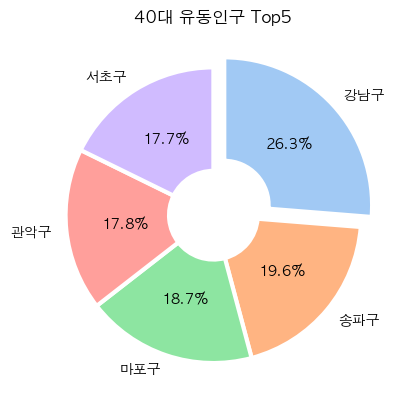

In [35]:
explode = [0.1, 0, 0, 0,0]
plt.pie(
    pop_40["gen40_floating_pop"], 
    labels=pop_40["autono_nm"], 
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    colors=sns.color_palette("pastel"),
    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
    explode=explode
)
plt.title("40대 유동인구 Top5")
plt.show()

[Text(0.5, 1.0, '40대 유동인구 Top5')]

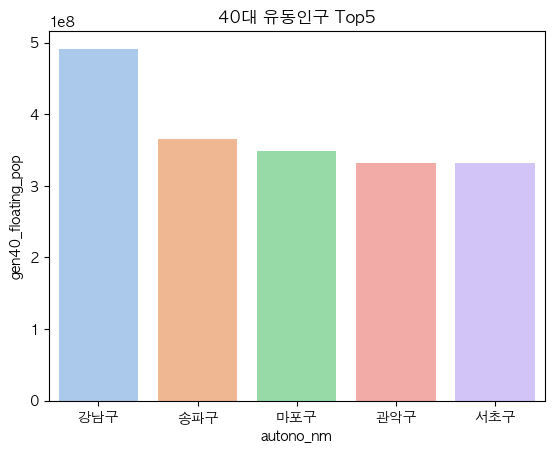

In [36]:
sns.set_palette(sns.color_palette("pastel"))
sns.barplot(
    data = pop_40,
    x = 'autono_nm',
    y = 'gen40_floating_pop'
).set(
    title = "40대 유동인구 Top5"
)

## 자치구별 음식업종 비율

In [37]:
# 구별 전체 음식점 수 (40대 유동인구 Top5에 포함된 자치구만)
sql = """
SELECT
  autono_nm,
  SUM(store_cnt+similar_store_cnt) as total_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "한복점", "재생용품 판매점")
  AND autono_nm IN('강남구', '송파구','마포구','관악구','서초구')
GROUP BY
  autono_nm
ORDER BY
  autono_nm
"""
store_all = client.query(sql).to_dataframe()
store_all

,autono_nm,total_cnt
0,강남구,443743
1,관악구,192688
2,마포구,316324
3,서초구,245401
4,송파구,274921


In [38]:
# 이거로 나눠!
store_total_cnt = list(store_all["total_cnt"])
store_total_cnt

[443743, 192688, 316324, 245401, 274921]

In [39]:
# 강남구 음식업별 점포 수
sql = """
SELECT
  service_nm,
  SUM(store_cnt+similar_store_cnt) as total_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "한복점", "재생용품 판매점")
  and autono_nm like '%강남%'
GROUP BY
  service_nm
ORDER BY
  service_nm
"""
store_gangnam = client.query(sql).to_dataframe()

# 업종 점포 수 / (자치구별)전체 업종 수
store_gangnam["total_rat"] = (round(store_gangnam["total_cnt"] / store_total_cnt[0], 3))
store_gangnam

,service_nm,total_cnt,total_rat
0,분식전문점,40349,0.091
1,양식음식점,47372,0.107
2,일식음식점,30760,0.069
3,제과점,15523,0.035
4,중식음식점,15945,0.036
5,치킨전문점,8667,0.02
6,커피-음료,69484,0.157
7,패스트푸드점,16162,0.036
8,한식음식점,174925,0.394
9,호프-간이주점,24556,0.055


In [40]:
store_gangnam = store_gangnam.sort_values("total_rat", ascending=False)
store_gangnam = store_gangnam[0:5]
store_gangnam

# >> 강남구에는 한식, 카페, 양식, 분식, 일식점 비율이 높기때문에 아래 음식점을 개업하는 것을 추천함

,service_nm,total_cnt,total_rat
8,한식음식점,174925,0.394
6,커피-음료,69484,0.157
1,양식음식점,47372,0.107
0,분식전문점,40349,0.091
2,일식음식점,30760,0.069


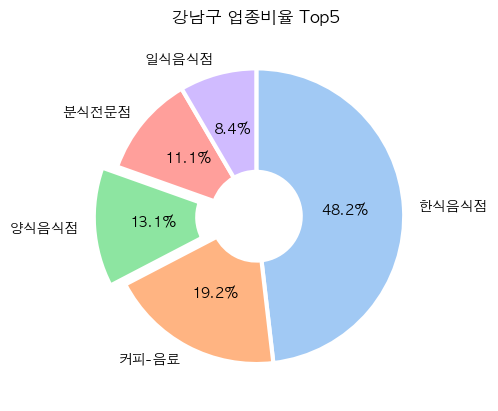

In [41]:
explode = [0, 0, 0.1, 0, 0]
plt.pie(
    store_gangnam["total_rat"], 
    labels=store_gangnam["service_nm"],
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    colors=sns.color_palette("pastel"),
    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
    explode = explode
)
plt.title("강남구 업종비율 Top5")
plt.show()

In [42]:
# 관악구 음식업별 점포 수
sql = """
SELECT
  service_nm,
  SUM(store_cnt+similar_store_cnt) as total_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "한복점", "재생용품 판매점")
  and autono_nm like '%관악%'
GROUP BY
  service_nm
ORDER BY
  service_nm
"""
store_gwanak = client.query(sql).to_dataframe()

# 업종 점포 수 / (자치구별)전체 업종 수
store_gwanak["total_rat"] = (round(store_gwanak["total_cnt"] / store_total_cnt[1], 3))
store_gwanak

,service_nm,total_cnt,total_rat
0,분식전문점,20059,0.104
1,양식음식점,8566,0.044
2,일식음식점,8841,0.046
3,제과점,6146,0.032
4,중식음식점,7685,0.04
5,치킨전문점,7239,0.038
6,커피-음료,22018,0.114
7,패스트푸드점,6570,0.034
8,한식음식점,88047,0.457
9,호프-간이주점,17517,0.091


In [43]:
store_gwanak = store_gwanak.sort_values("total_rat", ascending=False)[0:5]
store_gwanak

# >> 관악구에는 한식, 카페, 분식, 유흥, 일식점 비율이 높기때문에 이런 음식업을 개업하는 것을 추천함

,service_nm,total_cnt,total_rat
8,한식음식점,88047,0.457
6,커피-음료,22018,0.114
0,분식전문점,20059,0.104
9,호프-간이주점,17517,0.091
2,일식음식점,8841,0.046


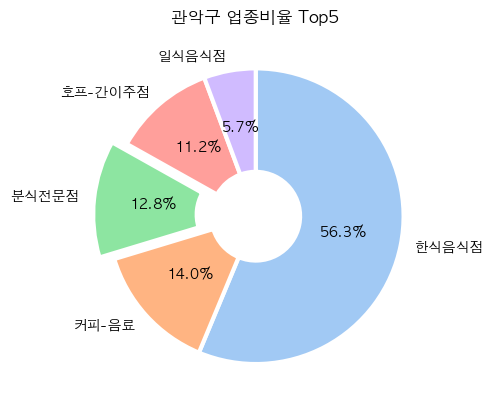

In [44]:
explode = [0, 0, 0.1, 0, 0]
plt.pie(
    store_gwanak["total_rat"], 
    labels=store_gwanak["service_nm"],
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    colors=sns.color_palette("pastel"),
    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
    explode = explode
)
plt.title("관악구 업종비율 Top5")
plt.show()

In [45]:
# 마포구 음식업별 점포 수
sql = """
SELECT
  service_nm,
  SUM(store_cnt+similar_store_cnt) as total_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "한복점", "재생용품 판매점")
  and autono_nm like '%마포%'
GROUP BY
  service_nm
ORDER BY
  service_nm
"""
store_mapo = client.query(sql).to_dataframe()

# 업종 점포 수 / (자치구별)전체 업종 수
store_mapo["total_rat"] = (round(store_mapo["total_cnt"] / store_total_cnt[2], 3))
store_mapo

,service_nm,total_cnt,total_rat
0,분식전문점,25566,0.081
1,양식음식점,30614,0.097
2,일식음식점,21184,0.067
3,제과점,12741,0.04
4,중식음식점,10954,0.035
5,치킨전문점,6404,0.02
6,커피-음료,56056,0.177
7,패스트푸드점,10547,0.033
8,한식음식점,116092,0.367
9,호프-간이주점,26166,0.083


In [46]:
store_mapo = store_mapo.sort_values("total_rat", ascending=False)[0:5]
store_mapo

# >> 마포구에는 한식, 카페, 양식, 유흥주점, 분식점 비율이 높기때문에 이런 가게를 개업하는 것을 추천함

,service_nm,total_cnt,total_rat
8,한식음식점,116092,0.367
6,커피-음료,56056,0.177
1,양식음식점,30614,0.097
9,호프-간이주점,26166,0.083
0,분식전문점,25566,0.081


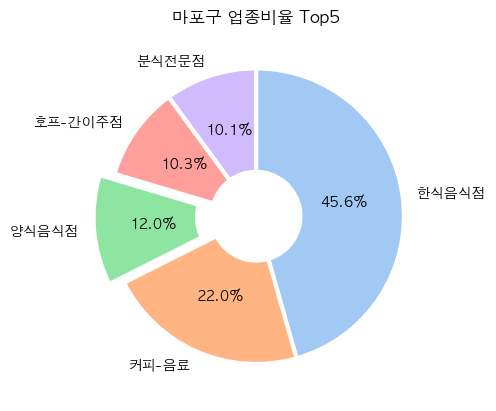

In [47]:
explode = [0, 0, 0.1, 0, 0]
plt.pie(
    store_mapo["total_rat"], 
    labels=store_mapo["service_nm"],
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    colors=sns.color_palette("pastel"),
    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
    explode=explode
)
plt.title("마포구 업종비율 Top5")
plt.show()

In [48]:
# 서초 음식업별 점포 수
sql = """
SELECT
  service_nm,
  SUM(store_cnt+similar_store_cnt) as total_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "한복점", "재생용품 판매점")
  and autono_nm like '%서초%'
GROUP BY
  service_nm
ORDER BY
  service_nm
"""
store_seocho = client.query(sql).to_dataframe()

# 업종 점포 수 / (자치구별)전체 업종 수
store_seocho["total_rat"] = (round(store_seocho["total_cnt"] / store_total_cnt[3], 3))
store_seocho

,service_nm,total_cnt,total_rat
0,분식전문점,27265,0.111
1,양식음식점,18299,0.075
2,일식음식점,12952,0.053
3,제과점,10855,0.044
4,중식음식점,8993,0.037
5,치킨전문점,5529,0.023
6,커피-음료,38543,0.157
7,패스트푸드점,7659,0.031
8,한식음식점,102204,0.416
9,호프-간이주점,13102,0.053


In [49]:
store_seocho = store_seocho.sort_values("total_rat", ascending=False)[0:5]
store_seocho

# >> 서초구에는 한식, 카페, 분식, 양식, 일식점 순으로 비율이 높기때문에 이런 가게를 개업하는 것을 추천함

,service_nm,total_cnt,total_rat
8,한식음식점,102204,0.416
6,커피-음료,38543,0.157
0,분식전문점,27265,0.111
1,양식음식점,18299,0.075
2,일식음식점,12952,0.053


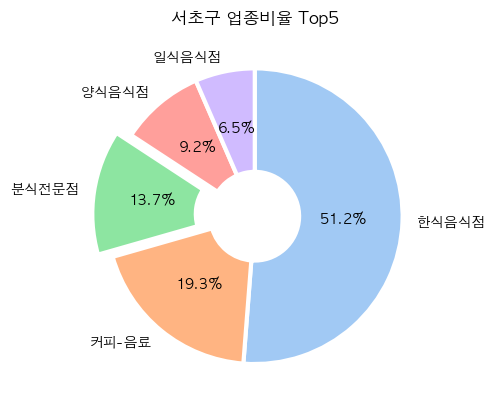

In [50]:
explode = [0, 0, 0.1, 0, 0]
plt.pie(
    store_seocho["total_rat"], 
    labels=store_seocho["service_nm"],
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    colors=sns.color_palette("pastel"),
    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
    explode=explode
)
plt.title("서초구 업종비율 Top5")
plt.show()

In [51]:
# 송파구 음식업별 점포 수
sql = """
SELECT
  service_nm,
  SUM(store_cnt+similar_store_cnt) as total_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "한복점", "재생용품 판매점")
  and autono_nm like '%송파%'
GROUP BY
  service_nm
ORDER BY
  service_nm
"""
store_songpa = client.query(sql).to_dataframe()

# 업종 점포 수 / (자치구별)전체 업종 수
store_songpa["total_rat"] = (round(store_songpa["total_cnt"] / store_total_cnt[4], 3))
store_songpa

,service_nm,total_cnt,total_rat
0,분식전문점,25777,0.094
1,양식음식점,16155,0.059
2,일식음식점,17078,0.062
3,제과점,11078,0.04
4,중식음식점,8883,0.032
5,치킨전문점,9148,0.033
6,커피-음료,38943,0.142
7,패스트푸드점,10527,0.038
8,한식음식점,120563,0.439
9,호프-간이주점,16769,0.061


In [52]:
store_songpa = store_songpa.sort_values("total_rat", ascending=False)[0:5]
store_songpa

# >> 송파구에는 한식, 카페, 분식, 일식, 유흥주점 순으로 비율이 높기때문에 이런 가게를 개업하는 것을 추천함

,service_nm,total_cnt,total_rat
8,한식음식점,120563,0.439
6,커피-음료,38943,0.142
0,분식전문점,25777,0.094
2,일식음식점,17078,0.062
9,호프-간이주점,16769,0.061


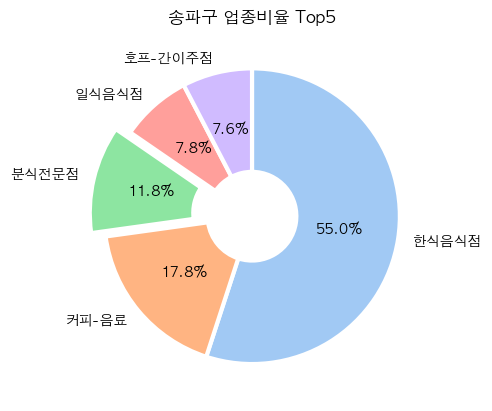

In [53]:
explode = [0, 0, 0.1, 0, 0]
plt.pie(
    store_songpa["total_rat"], 
    labels=store_songpa["service_nm"],
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    colors=sns.color_palette("pastel"),
    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
    explode=explode
)
plt.title("송파구 업종비율 Top5")
plt.show()

## 40대 유동인구대비 점포 수

In [54]:
pop_40

,autono_nm,gen40_floating_pop
0,강남구,491445441
1,송파구,366025396
2,마포구,348903128
3,관악구,332521430
4,서초구,331820214


In [55]:
# 이거로 나눠!
pop_40_cnt = list(pop_40["gen40_floating_pop"])
pop_40_cnt

[491445441, 366025396, 348903128, 332521430, 331820214]

In [56]:
# 강남구 40대 유동인구 대비 점포 비율
store_gangnam["per_40fp"] = (store_gangnam["total_cnt"] / pop_40_cnt[0])
store_gangnam

,service_nm,total_cnt,total_rat,per_40fp
8,한식음식점,174925,0.394,0.000356
6,커피-음료,69484,0.157,0.000141
1,양식음식점,47372,0.107,0.000096
0,분식전문점,40349,0.091,0.000082
2,일식음식점,30760,0.069,0.000063


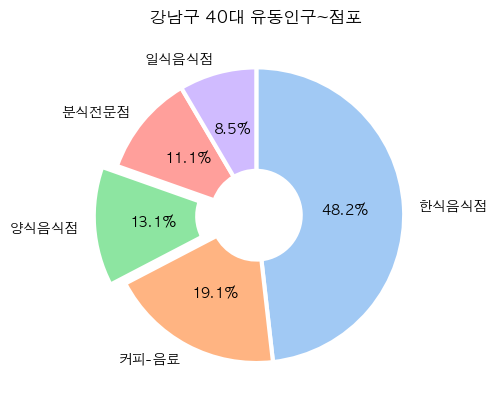

In [59]:
explode = [0, 0, 0.1, 0, 0]
plt.pie( 
    store_gangnam["per_40fp"], 
    labels=store_gangnam["service_nm"],
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    colors=sns.color_palette("pastel"),
    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
    explode=explode
)
plt.title("강남구 40대 유동인구~점포")
plt.show()

# >> 앞서 언급한 5개 음식점 40대 유동인구대비 점포 비율
# >> 한식점이 50%에 가깝기 때문에 한식점을 개업하기에는 조금 아쉬워 보임
# >> 한식점은 보류하는 것이 좋을 듯 함
# >> 또한 카페 비율이 20%에 가깝기때문에 카페 개업도 피하는 것이 좋을 듯 함

In [60]:
# 관악구 40대 유동인구 대비 점포 비율
store_gwanak["per_40fp"] = (store_gwanak["total_cnt"] / pop_40_cnt[1])
store_gwanak

,service_nm,total_cnt,total_rat,per_40fp
8,한식음식점,88047,0.457,0.000241
6,커피-음료,22018,0.114,0.00006
0,분식전문점,20059,0.104,0.000055
9,호프-간이주점,17517,0.091,0.000048
2,일식음식점,8841,0.046,0.000024


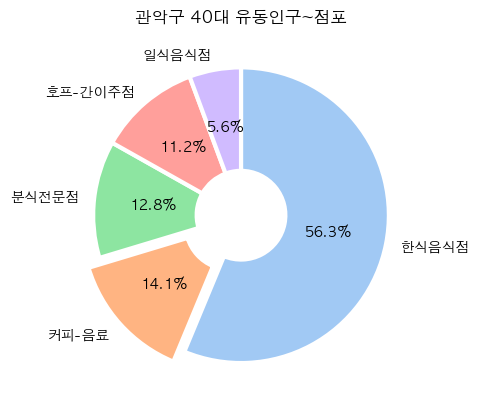

In [62]:
explode = [0, 0.1, 0, 0, 0]
plt.pie(
    store_gwanak["per_40fp"], 
    labels=store_gwanak["service_nm"],
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    colors=sns.color_palette("pastel"),
    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
    explode = explode
)
plt.title("관악구 40대 유동인구~점포")
plt.show()

# >> 앞서 언급한 5개 음식점 40대 유동인구대비 점포 비율
# >> 한식점 비율이 5개 자치구 중 가장 높은 56%이기때문에 관악구에 한식점 개업은 보류하는 것이 좋겠음
# >> 또한, 관악구에는 대학교가 있어서 학기 중 대학생 장사를 노린다면 카페 개업도 괜찮을 듯함

In [63]:
# 마포구 40대 유동인구 대비 점포 비율
store_mapo["per_40fp"] = (store_mapo["total_cnt"] / pop_40_cnt[2])
store_mapo

,service_nm,total_cnt,total_rat,per_40fp
8,한식음식점,116092,0.367,0.000333
6,커피-음료,56056,0.177,0.000161
1,양식음식점,30614,0.097,0.000088
9,호프-간이주점,26166,0.083,0.000075
0,분식전문점,25566,0.081,0.000073


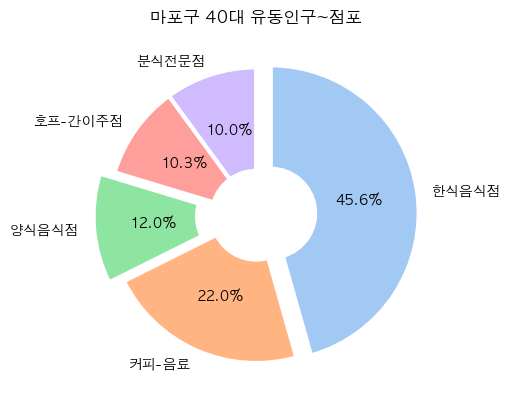

In [71]:
explode = [0.1, 0, 0.1, 0, 0]
plt.pie(
    store_mapo["per_40fp"], 
    labels=store_mapo["service_nm"],
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    colors=sns.color_palette("pastel"),
    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
    explode = explode
)
plt.title("마포구 40대 유동인구~점포")
plt.show()

# >> 앞서 언급한 5개 음식점 40대 유동인구대비 점포 비율
# >> 한식점, 카페 비율이 높기 때문에 한식점과 카페는 보류하는 것이 좋을 듯 함
# >> 나머지 양식, 유흥주점, 분식점을 개업하는 것을 추천함

In [66]:
# 서초구 40대 유동인구 대비 점포 비율
store_seocho["per_40fp"] = (store_seocho["total_cnt"] / pop_40_cnt[3])
store_seocho

,service_nm,total_cnt,total_rat,per_40fp
8,한식음식점,102204,0.416,0.000307
6,커피-음료,38543,0.157,0.000116
0,분식전문점,27265,0.111,0.000082
1,양식음식점,18299,0.075,0.000055
2,일식음식점,12952,0.053,0.000039


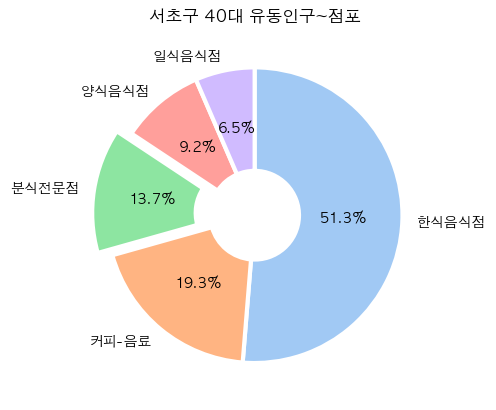

In [68]:
explode = [0, 0, 0.1, 0, 0]
plt.pie(
    store_seocho["per_40fp"], 
    labels=store_seocho["service_nm"],
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    colors=sns.color_palette("pastel"),
    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
    explode = explode
)
plt.title("서초구 40대 유동인구~점포")
plt.show()

# >> 앞서 언급한 5개 음식점 40대 유동인구대비 점포 비율
# >> 한식점 비율이 50%를 넘기 때문에 한식점 개업은 보류하는 것이 좋을 듯 함
# >> 또한, 카페 점포 비율도 20%에 가까움.
# >> 그렇기때문에 분식, 양식, 일식점 개업을 추천함.

In [69]:
# 송파구 40대 유동인구 대비 점포 비율
store_songpa["per_40fp"] = (store_songpa["total_cnt"] / pop_40_cnt[4])
store_songpa

,service_nm,total_cnt,total_rat,per_40fp
8,한식음식점,120563,0.439,0.000363
6,커피-음료,38943,0.142,0.000117
0,분식전문점,25777,0.094,0.000078
2,일식음식점,17078,0.062,0.000051
9,호프-간이주점,16769,0.061,0.000051


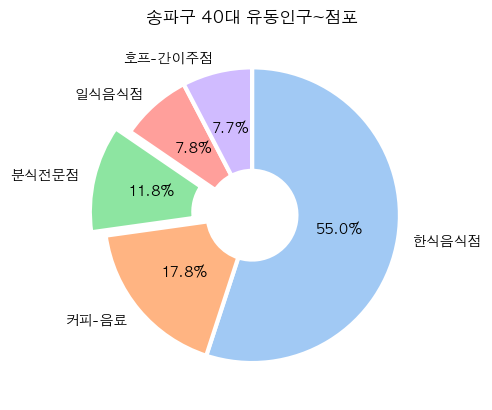

In [72]:
explode = [0, 0, 0.1, 0, 0]
plt.pie(
    store_songpa["per_40fp"], 
    labels=store_songpa["service_nm"],
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    colors=sns.color_palette("pastel"),
    wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
    explode = explode
)
plt.title("송파구 40대 유동인구~점포")
plt.show()

# >> 앞서 언급한 5개 음식점 40대 유동인구대비 점포 비율
# >> 한식점 비율이 관악구 다음인 55%이기때문에 관악구와 똑같은 이유로 한식점 개업은 피하는 것이 좋겠음

## 최종 결론

In [131]:
# 강남구
# >> 양식, 분식, 일식

# 관악
# >> 카페(대학생 타겟), 분식, 술집, 일식

# 마포
# >> 양식, 유흥주점, 분식

# 서초
# >> 분식, 양식, 일식

# 송파
# >> 분식, 일식, 유흥주점